In [1]:
import os
import ast

# Define the root directory for the project
root_dir = "Loop-Labyrinth-Analysis"

# Function to extract imports from a file
def extract_imports(file_path):
    with open(file_path, "r") as file:
        try:
            tree = ast.parse(file.read(), filename=file_path)
        except SyntaxError:
            return []

    imports = []
    for node in ast.walk(tree):
        if isinstance(node, ast.Import):
            for alias in node.names:
                imports.append(alias.name)
        elif isinstance(node, ast.ImportFrom):
            imports.append(node.module)
    return imports

# Walk through the directories and parse the files
def gather_imports(root_dir):
    imports_map = {}
    
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".py") and "__pycache__" not in subdir:
                file_path = os.path.join(subdir, file)
                file_key = os.path.relpath(file_path, root_dir)
                imports_map[file_key] = extract_imports(file_path)
    return imports_map

# Print the gathered imports
def print_imports(imports_map):
    for file, imports in imports_map.items():
        print(f"\nFile: {file}")
        print(f"Imports: {imports}")


# Run the process
imports_map = gather_imports(root_dir)

# Print the imports for each file
print_imports(imports_map)


File: app.py
Imports: ['flask', 'controllers.user_controller']

File: script.py
Imports: ['os', 'ast', 'networkx', 'matplotlib.pyplot']

File: controllers\auth_controller.py
Imports: ['flask', 'services.auth_service']

File: controllers\product_controller.py
Imports: ['flask', 'services.product_service']

File: controllers\user_controller.py
Imports: ['flask', 'services.user_service']

File: models\order.py
Imports: ['services.user_service', 'services.product_service']

File: models\product.py
Imports: ['controllers.product_controller']

File: models\user.py
Imports: ['controllers.user_controller']

File: services\auth_service.py
Imports: ['models.user', 'utils.auth_utils']

File: services\order_service.py
Imports: ['models.order', 'utils.common', 'services.auth_service']

File: services\product_service.py
Imports: ['models.product', 'utils.another_util', 'services.auth_service']

File: services\session_service.py
Imports: ['models.user']

File: services\user_service.py
Imports: ['mod

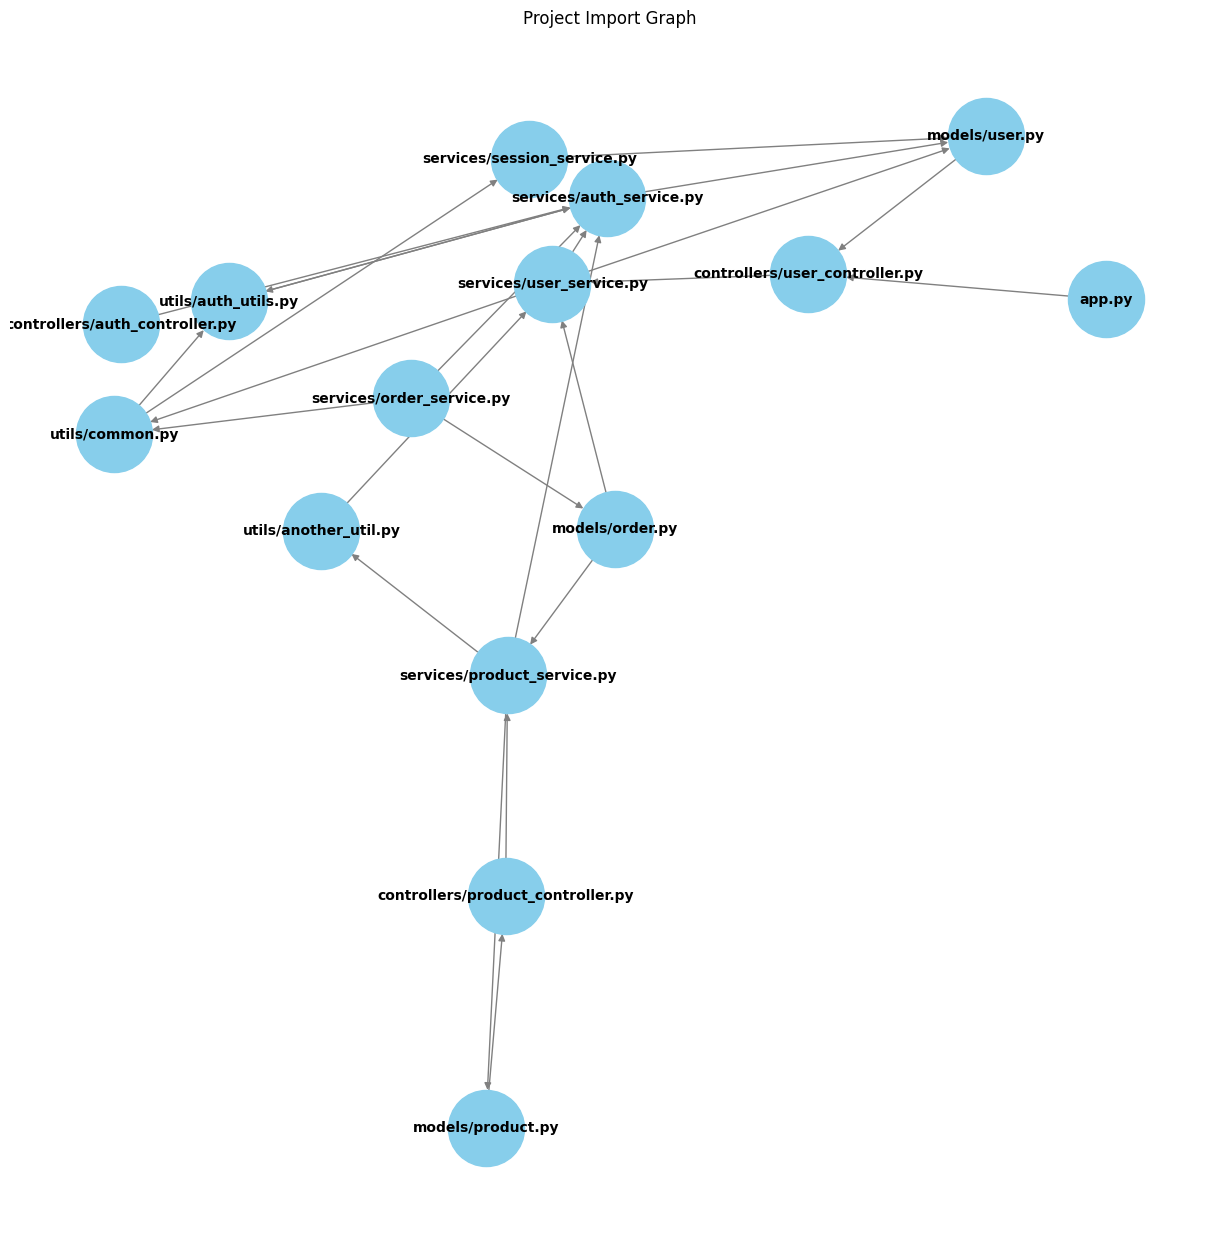

In [3]:
import os
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Define the root directory for the project
root_dir = "Loop-Labyrinth-Analysis"

# Function to extract imports from a file
def extract_imports(file_path):
    with open(file_path, "r") as file:
        try:
            tree = ast.parse(file.read(), filename=file_path)
        except SyntaxError:
            return []

    imports = []
    for node in ast.walk(tree):
        if isinstance(node, ast.Import):
            for alias in node.names:
                imports.append(alias.name)
        elif isinstance(node, ast.ImportFrom):
            imports.append(node.module)
    return imports

# Walk through the directories and parse the files
def gather_imports(root_dir):
    imports_map = {}
    
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".py") and "__pycache__" not in subdir:
                file_path = os.path.join(subdir, file)
                file_key = os.path.relpath(file_path, root_dir).replace("\\", "/")  # Handle path separators for all OS
                imports_map[file_key] = extract_imports(file_path)
    
    return imports_map

# Link the imports to the actual Python files
def resolve_imports(imports_map):
    resolved_imports = {}
    
    for file, imports in imports_map.items():
        resolved_imports[file] = []
        for imp in imports:
            # Try to map imports to actual files in the project
            for other_file in imports_map:
                if other_file.endswith(f"{imp.replace('.', '/')}.py"):  # Handle import as a path
                    resolved_imports[file].append(other_file)
    
    return resolved_imports

# Create a graph of imports
def create_import_graph(resolved_imports):
    graph = nx.DiGraph()  # Directed graph
    
    for file, imported_files in resolved_imports.items():
        for imported_file in imported_files:
            graph.add_edge(file, imported_file)
    
    return graph

# Visualize the graph
def visualize_graph(graph):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(graph, k=0.3, iterations=50)  # Adjust layout for better spacing
    
    # Draw nodes and edges with arrows
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', arrows=True)
    
    plt.title("Project Import Graph")
    plt.show()

# Run the process
imports_map = gather_imports(root_dir)
resolved_imports = resolve_imports(imports_map)
graph = create_import_graph(resolved_imports)
visualize_graph(graph)
